In [254]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn import neighbors, datasets
from sklearn import tree

import seaborn as sns # theme & dataset
#sns.set_theme(style="whitegrid")
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

# for visualization samples
import pandas as pd

# settings for plot size
plt.rcParams["figure.dpi"] = 140

print(sk.__version__)

Matplotlib Version : 3.3.4
Seaborn Version : 0.11.1
0.24.1


In [256]:
# preprocesssing the data
data = pd.read_csv('./StudentsPerformance.csv')

data.columns = "gender","race","parental_edu","lunch","test_prep","math","reading","writing"

#race_dummies = pd.get_dummies(data.race)
#data = pd.concat([data.drop(columns=["race"]), race_dummies], axis = 1)

LE = preprocessing.LabelEncoder()
labeled_data = data.apply(LE.fit_transform)

data.head()


#PARENTAL EDU
# 0: associate's degree
# 1: bachelor's degree
# 2: high school
# 3: master's degree
# 4: some college
# 5: some high school

,gender,race,parental_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [257]:
labeled_data

,gender,race,parental_edu,lunch,test_prep,math,reading,writing
0,0,1,1,1,1,52,44,50
1,0,2,4,1,0,49,62,64
2,0,1,3,1,1,70,67,69
3,1,0,0,0,1,27,29,20
4,1,2,4,1,1,56,50,51
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,68,70,71
996,1,2,2,0,1,42,27,31
997,0,2,2,0,0,39,43,41
998,0,3,4,1,0,48,50,53


[Text(325.5, 369.95, 'gender <= 0.5\ngini = 0.98\nsamples = 1000\nvalue = [[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 3, 1\n 2, 5, 2, 4, 3, 4, 10, 6, 6, 5, 9, 9, 11\n 11, 11, 17, 15, 11, 18, 24, 18, 18, 9, 18, 25\n 32, 16, 27, 35, 26, 20, 36, 24, 26, 26, 32, 18\n 26, 18, 27, 25, 21, 21, 24, 14, 22, 17, 22, 18\n 8, 11, 14, 8, 16, 15, 6, 8, 9, 6, 4, 7, 2\n 3, 6, 3, 3, 7]\n[1, 1, 2, 1, 1, 2, 2, 1, 4, 3, 2, 6, 1, 6\n 7, 9, 4, 7, 6, 4, 10, 10, 7, 16, 16, 13, 18\n 16, 16, 17, 28, 17, 21, 24, 22, 20, 32, 19, 27\n 30, 23, 15, 26, 20, 34, 30, 33, 26, 25, 24, 27\n 19, 14, 25, 20, 14, 26, 18, 19, 13, 9, 12, 17\n 6, 10, 6, 3, 8, 4, 5, 3, 17, 0, 0, 0, 0, 0\n 0, 0, 0, 0]\n[1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 3, 1, 4, 2\n 6, 2, 3, 8, 7, 12, 8, 7, 10, 10, 8, 9, 10\n 17, 20, 17, 25, 14, 14, 19, 18, 13, 20, 21, 27\n 15, 22, 22, 24, 25, 31, 23, 33, 18, 25, 28, 35\n 22, 25, 24, 25, 19, 27, 20, 24, 13, 16, 14, 12\n 11, 11, 9, 10, 11, 9, 8, 6, 8, 4, 2, 2, 4\n 14, 0, 0, 0, 0]]'),
 Text(162.75, 264.25, 'lunch <= 0.5\ngin

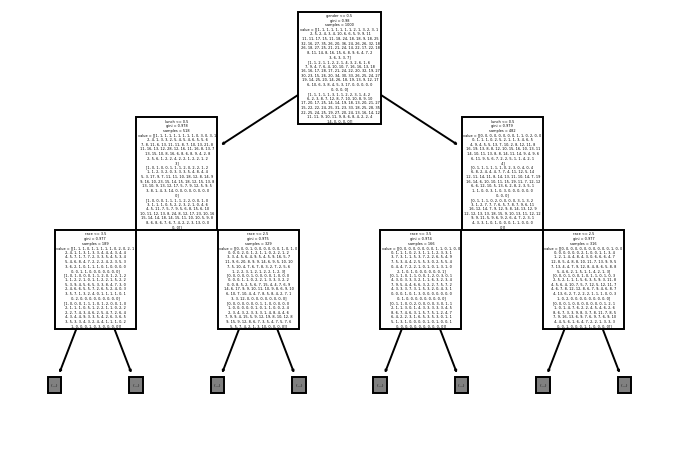

In [261]:
X = labeled_data[["gender", "race", "lunch"]]
y = labeled_data[["math", "reading", "writing"]]

model = DecisionTreeClassifier()
model.fit(X, y)

predictions = model.predict([[60, 20, 40]])
tree.plot_tree(model, max_depth=2, feature_names=["gender", "race", "lunch"]) 

[Text(325.5, 369.95, 'math <= 0.5\ngini = 0.98\nsamples = 1000\nvalue = [[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 3, 1\n 2, 5, 2, 4, 3, 4, 10, 6, 6, 5, 9, 9, 11\n 11, 11, 17, 15, 11, 18, 24, 18, 18, 9, 18, 25\n 32, 16, 27, 35, 26, 20, 36, 24, 26, 26, 32, 18\n 26, 18, 27, 25, 21, 21, 24, 14, 22, 17, 22, 18\n 8, 11, 14, 8, 16, 15, 6, 8, 9, 6, 4, 7, 2\n 3, 6, 3, 3, 7]\n[1, 1, 2, 1, 1, 2, 2, 1, 4, 3, 2, 6, 1, 6\n 7, 9, 4, 7, 6, 4, 10, 10, 7, 16, 16, 13, 18\n 16, 16, 17, 28, 17, 21, 24, 22, 20, 32, 19, 27\n 30, 23, 15, 26, 20, 34, 30, 33, 26, 25, 24, 27\n 19, 14, 25, 20, 14, 26, 18, 19, 13, 9, 12, 17\n 6, 10, 6, 3, 8, 4, 5, 3, 17, 0, 0, 0, 0, 0\n 0, 0, 0, 0]\n[1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 3, 1, 4, 2\n 6, 2, 3, 8, 7, 12, 8, 7, 10, 10, 8, 9, 10\n 17, 20, 17, 25, 14, 14, 19, 18, 13, 20, 21, 27\n 15, 22, 22, 24, 25, 31, 23, 33, 18, 25, 28, 35\n 22, 25, 24, 25, 19, 27, 20, 24, 13, 16, 14, 12\n 11, 11, 9, 10, 11, 9, 8, 6, 8, 4, 2, 2, 4\n 14, 0, 0, 0, 0]]'),
 Text(162.75, 264.25, 'writing <= 0.5\ngin

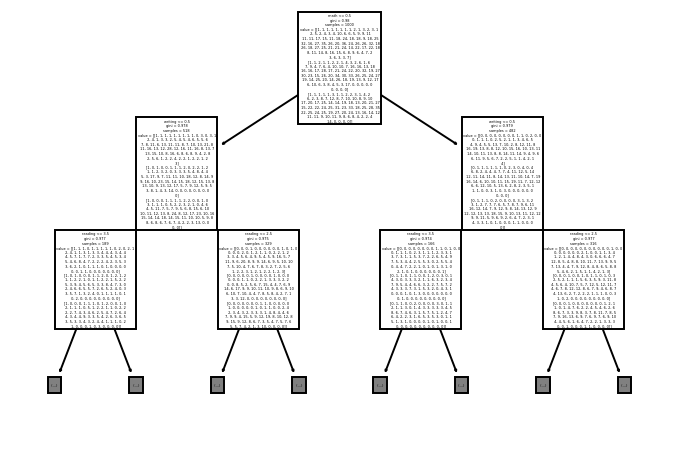

In [262]:
X = labeled_data[["gender", "race", "lunch"]]
y = labeled_data[["math", "reading", "writing"]]

model = DecisionTreeClassifier()
model.fit(X, y)

tree.plot_tree(model, max_depth=2, feature_names=["math", "reading", "writing"]) 

In [264]:
X = data[["math", "reading", "writing"]]
y = data["gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

acc_score = accuracy_score(y_test, predictions)
acc_score


0.825

In [265]:
X = data[["math", "reading", "writing"]]
y = data[["gender", "race", "lunch", "parental_edu"]]

clf = RandomForestClassifier(random_state=42)

clf.fit(X, y)

clf.predict([[60, 20, 40]])

array([['male', 'group C', 'standard', 'some high school']], dtype=object)

In [266]:
neigh = KNeighborsClassifier(n_neighbors=25)

neigh.fit(X, y)
neigh.predict([[60, 20, 40]])

array([['male', 'group D', 'standard', "associate's degree"]],
      dtype=object)

In [267]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

kmeans.labels_

data["labels"] = kmeans.labels_

kmeans.cluster_centers_

array([[65.20045558, 68.40774487, 67.7881549 ],
       [81.69871795, 85.00320513, 84.04487179],
       [48.09638554, 50.67068273, 48.48594378]])

In [268]:
kmeans.predict([[20, 10, 10]])

array([2], dtype=int32)

In [269]:
kmeans.cluster_centers_

array([[65.20045558, 68.40774487, 67.7881549 ],
       [81.69871795, 85.00320513, 84.04487179],
       [48.09638554, 50.67068273, 48.48594378]])

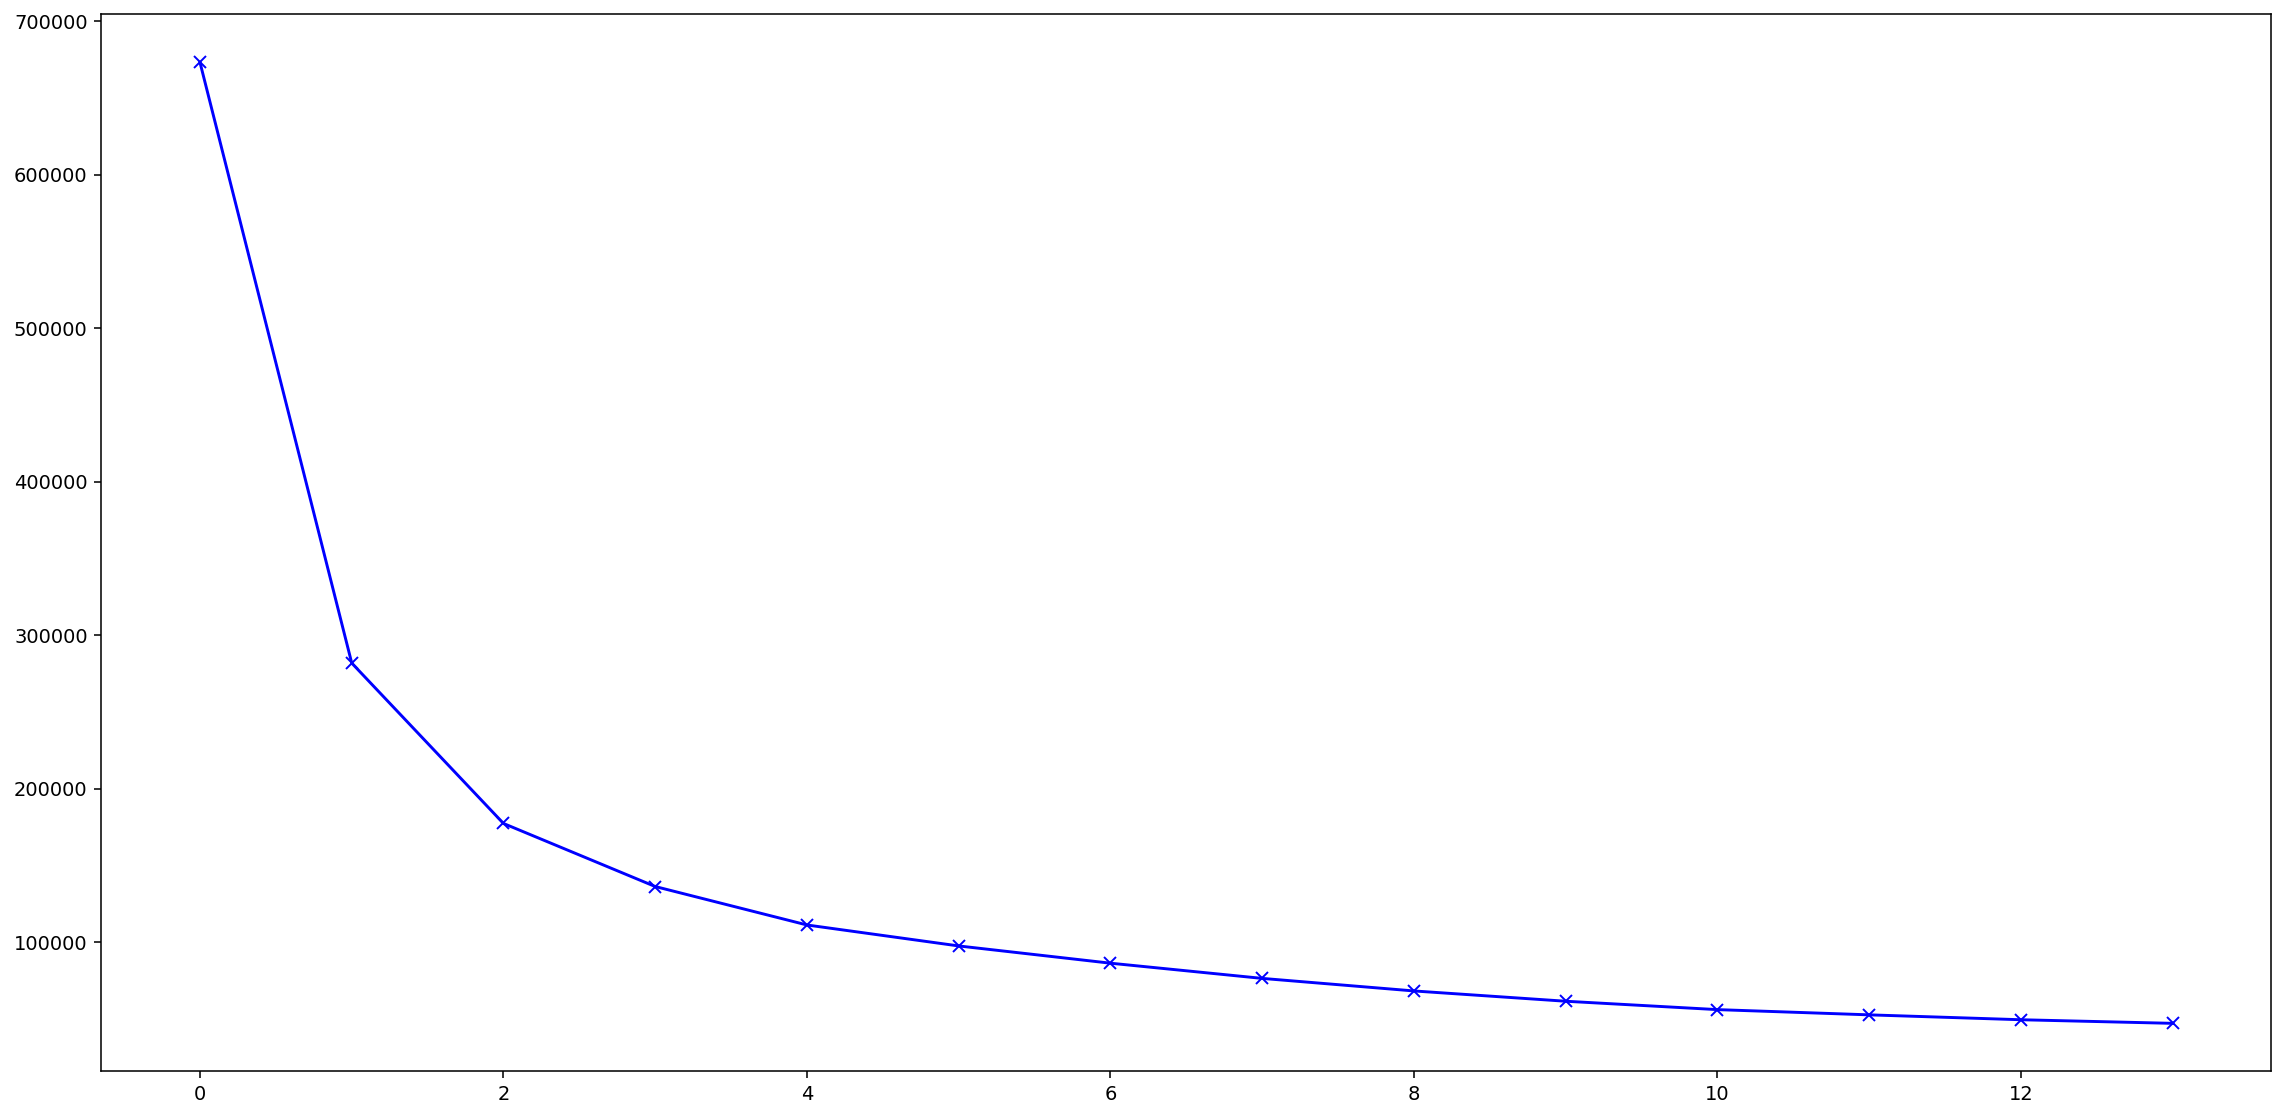

In [270]:
# For each k value, we will initialise k-means and use the inertia attribute to 
# identify the sum of squared distances of samples to the nearest cluster centre
# As k ( nombre de cluster )increases, the sum of squared distance tends to zero.
# Imagine we set k to its maximum value n (where n is number of samples)
# each sample will form its own cluster meaning sum of squared distances equals zero.
kmeans = KMeans()

n_clusters=15
cost=[]
for i in range(1, n_clusters):
    kmeans = KMeans(i)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)

# elbow method using inertia ( Sum of squared distances of samples to their closest cluster center )
plt.figure(figsize=(20,10))
plt.plot(cost, 'bx-')

In [271]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

print(knn.predict([[60, 20, 40]]))

[['male' 'group A' 'standard' 'some high school']]


In [272]:
pre_result = pd.concat([X, y], axis=1)

result = pd.concat([X_test, y_test], axis=1)

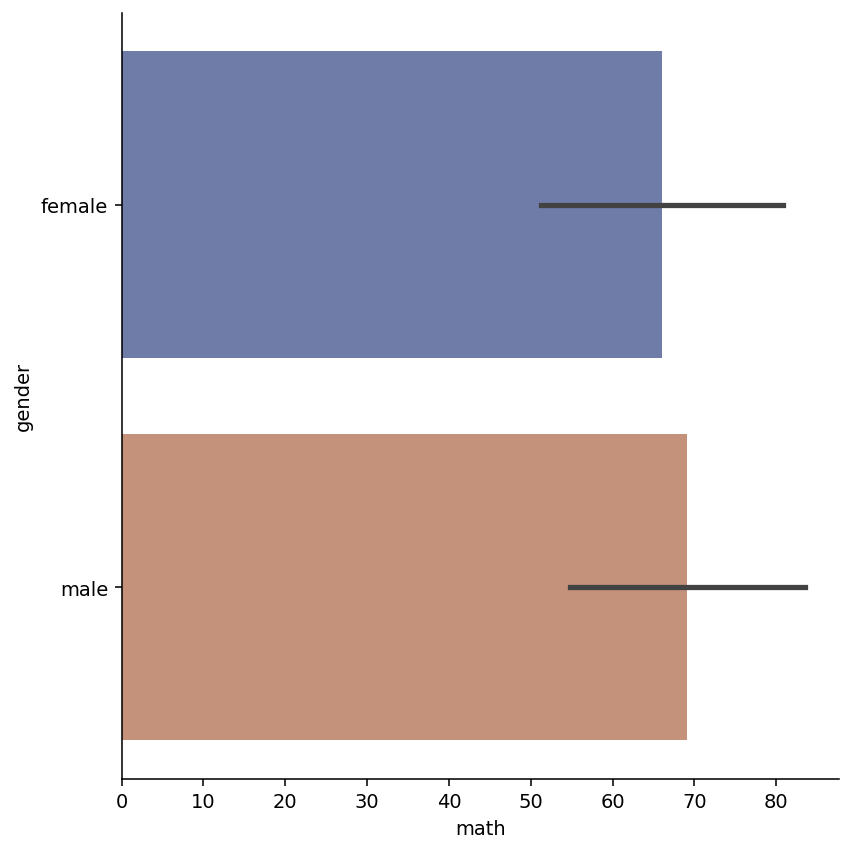

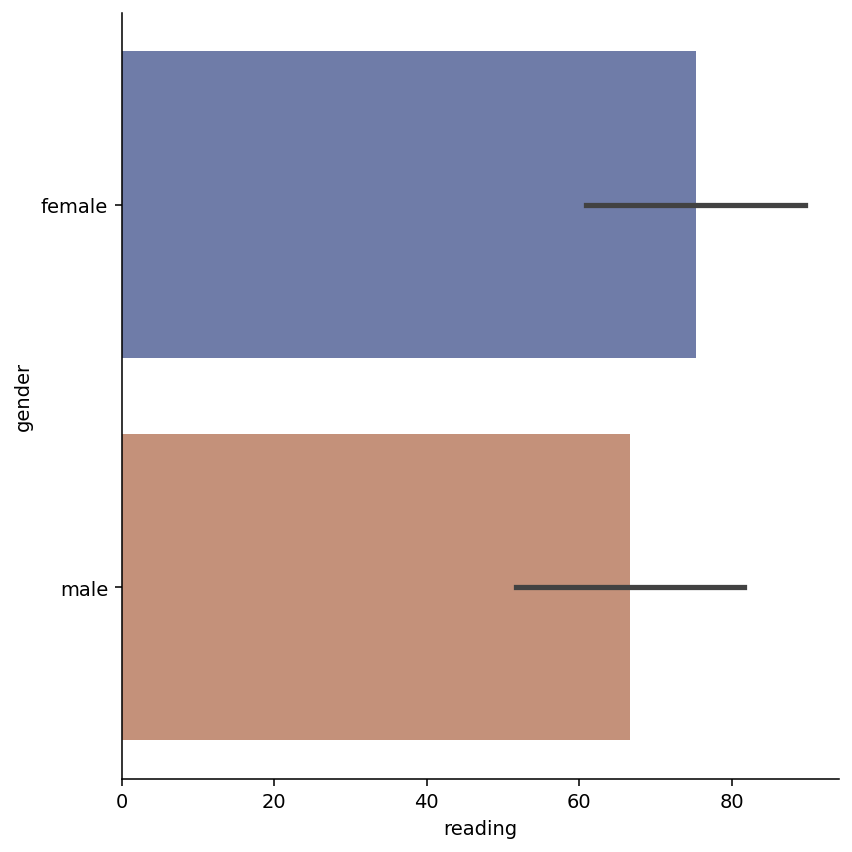

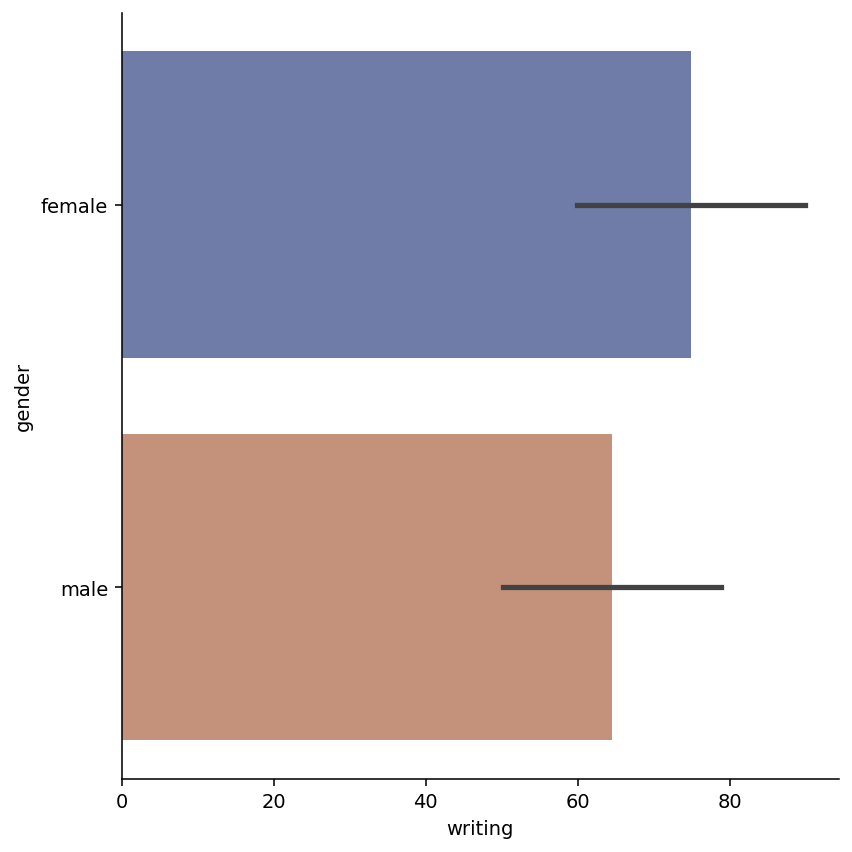

In [273]:
for i in result.drop(columns=["gender"]).columns:
    
    sns.catplot(
        data=result, kind="bar",
        x=i, y="gender",
        ci="sd", palette="dark", alpha=.6, height=6, orient="h"
    )

<AxesSubplot:>

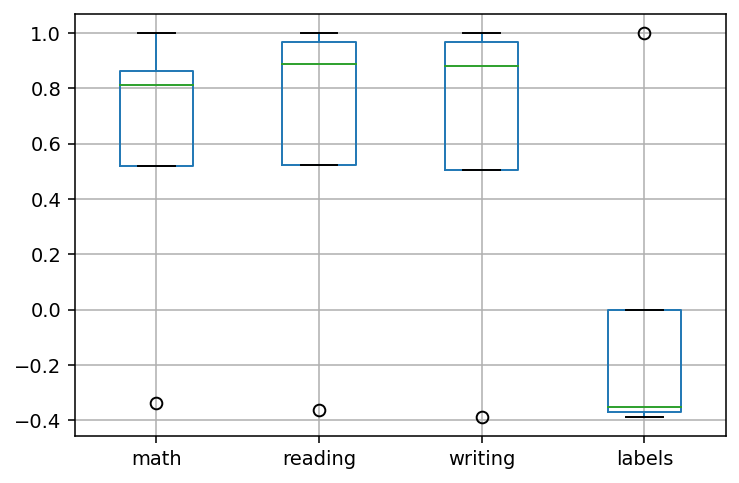

In [274]:
corr = data.corr()
corr.boxplot()

In [275]:
data.isna().sum()
# No missing data in this dataset

gender          0
race            0
parental_edu    0
lunch           0
test_prep       0
math            0
reading         0
writing         0
labels          0
dtype: int64

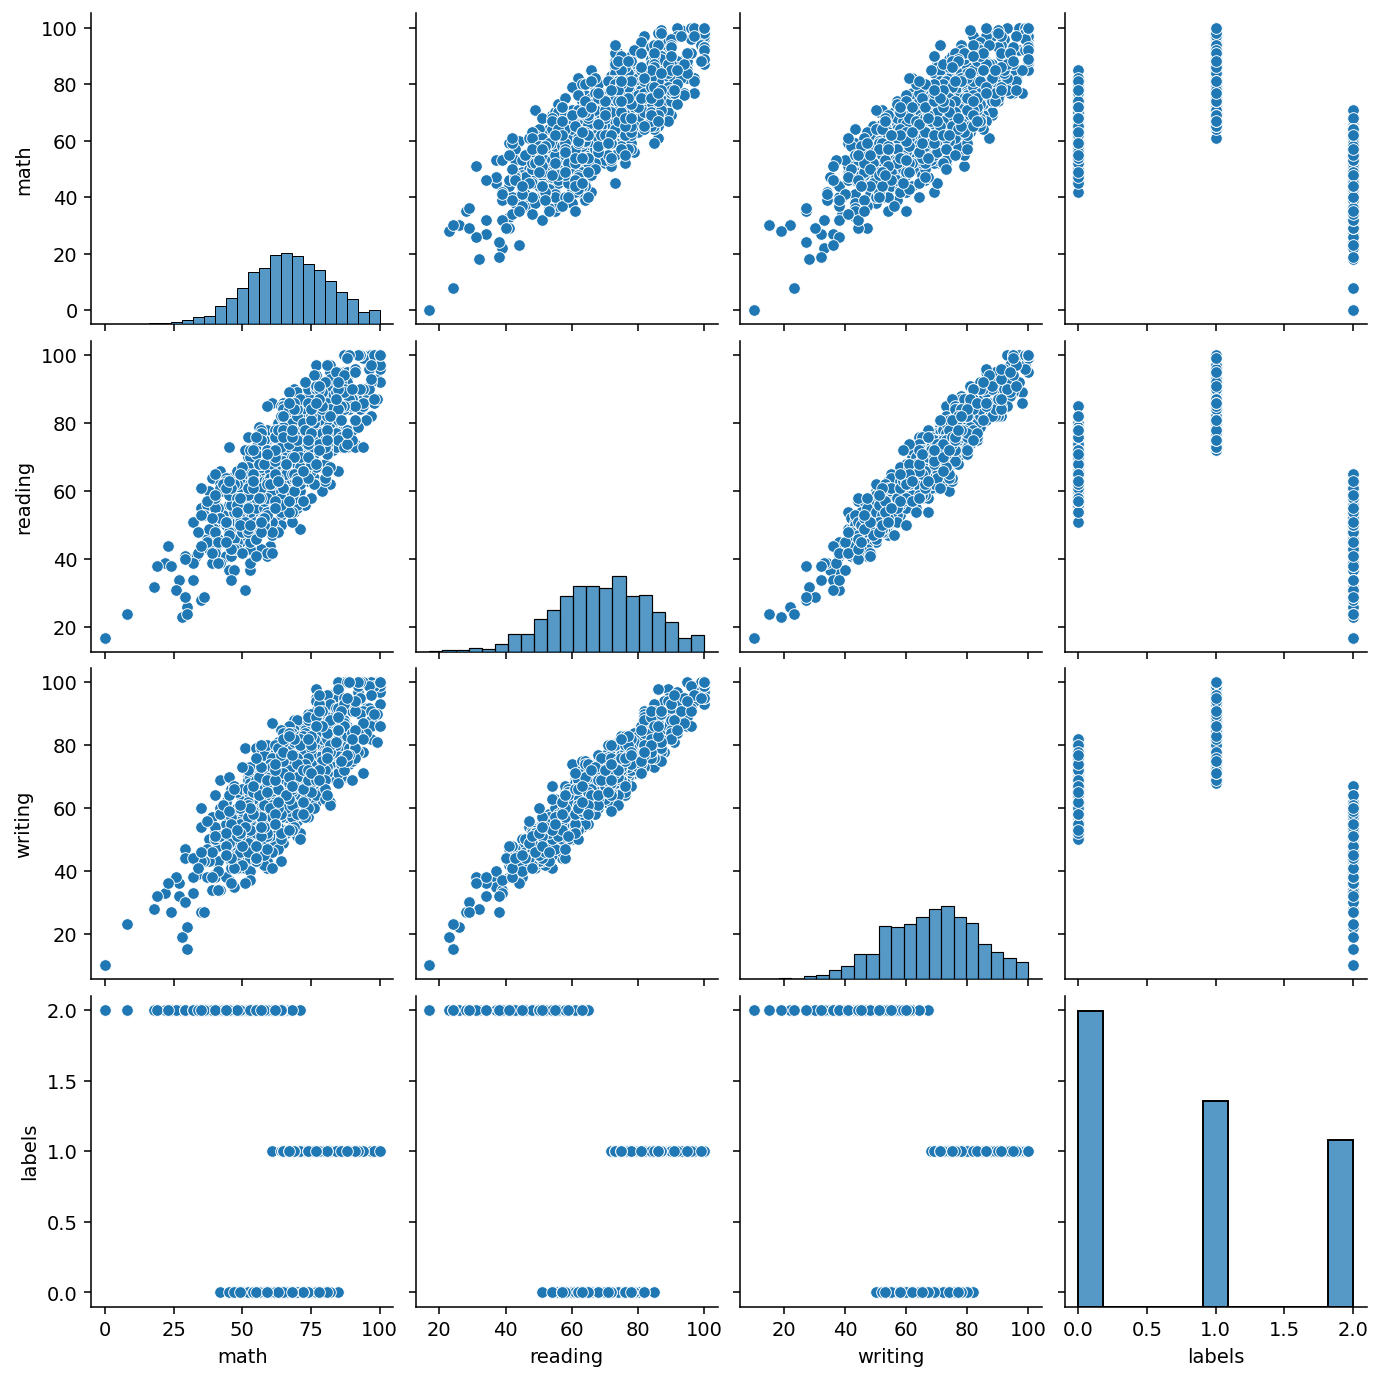

In [276]:
sns.pairplot(data.iloc[:,:])

In [277]:
train_set = data[["math", "reading", "writing"]]
target_set = data["gender"]

In [278]:
# Répartition Gender avant le train_test_split
target_set.value_counts(normalize=True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

In [279]:
x_train, x_test, y_train, y_test = train_test_split(train_set, target_set, 
    test_size=0.33, random_state=42, stratify=target_set)

model = RandomForestClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [280]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[142,  29],
       [ 23, 136]])

In [281]:
acc = conf_mat.diagonal().sum()/conf_mat.sum()

err = 1 - acc
print("taux d'erreur ", err)

taux d'erreur  0.1575757575757576


In [282]:
accuracy_score = accuracy_score(y_test, predictions)
accuracy_score

0.8424242424242424

In [283]:
err_default = err
neighbors = range(2, 101)
errors = []
for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k) 	# n_jobs=-1
	knn.fit(x_train, y_train)
	err = round((1.0 - knn.score(x_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')


Results : knn = 2 => err_test = 18.485

Improvement of -18.327424242424243%



Results : knn = 3 => err_test = 14.848

Improvement of -14.690424242424243%



Results : knn = 4 => err_test = 16.97

Improvement of -16.812424242424242%



Results : knn = 5 => err_test = 15.455

Improvement of -15.297424242424242%



Results : knn = 6 => err_test = 16.667

Improvement of -16.509424242424245%



Results : knn = 7 => err_test = 14.545

Improvement of -14.387424242424242%



Results : knn = 8 => err_test = 16.364

Improvement of -16.206424242424244%



Results : knn = 9 => err_test = 13.939

Improvement of -13.781424242424242%



Results : knn = 10 => err_test = 14.545

Improvement of -14.387424242424242%



Results : knn = 11 => err_test = 13.939

Improvement of -13.781424242424242%



Results : knn = 12 => err_test = 13.939

Improvement of -13.781424242424242%



Results : knn = 13 => err_test = 14.848

Improvement of -14.690424242424243%



Results : knn = 14 => err_test = 15.455

Improve

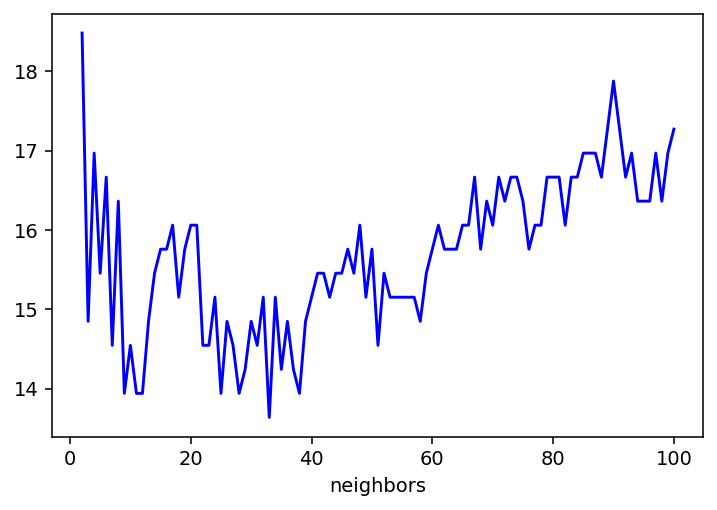

In [284]:
from matplotlib import pyplot as plt

plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')
plt.show()